# Connecting to Databases

## Using R

See examples/r-databases.ipynb for how to connect using R

## Using plain SQL

This will show us how to run raw sql against available databases.

### Setting up

First, we need to enable SQL:

In [13]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


### Making queries in plain SQL

Now that SQL is loaded, blocks whose first line is `%sql` will read as queries:

In [14]:
%%sql
DROP TABLE IF EXISTS section_counts;
CREATE TEMP TABLE section_counts AS 
SELECT assigned_section, COUNT(*) FROM cts_forms_report
-- WHERE status = 'new'
GROUP BY assigned_section
ORDER BY assigned_section;

SELECT * FROM section_counts

 * postgresql://analytics:***@db:5432/postgres
Done.
12 rows affected.
12 rows affected.


assigned_section,count
ADM,417
APP,435
CRM,404
DRS,432
ELS,433
EOS,434
FCS,420
HCE,436
IER,413
POL,429


### Using the results

You can then query the results directly into python variables for analysis:

In [15]:
results = %sql SELECT * FROM section_counts;
print(results)

 * postgresql://analytics:***@db:5432/postgres
12 rows affected.
+------------------+-------+
| assigned_section | count |
+------------------+-------+
|       ADM        |  417  |
|       APP        |  435  |
|       CRM        |  404  |
|       DRS        |  432  |
|       ELS        |  433  |
|       EOS        |  434  |
|       FCS        |  420  |
|       HCE        |  436  |
|       IER        |  413  |
|       POL        |  429  |
|       SPL        |  449  |
|       VOT        |  418  |
+------------------+-------+


Or, we can get fancy (make sure to run the above, first, as we're re-using the `results` variable!):

<BarContainer object of 12 artists>

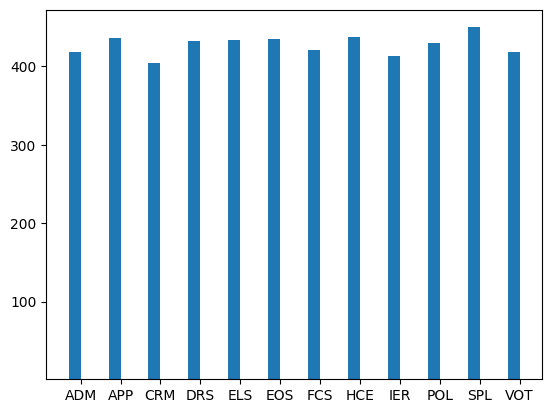

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

df = results.DataFrame()

plt.bar(x=df['assigned_section'], 
        height=df['count'],
        width=-0.3, 
        bottom=1, 
        align="edge")